In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [2]:
X = []
y = []

In [3]:
for i in os.listdir("RnE/src/2nd/faces"):
    if '_questions' in i:
        y.append(1.)
    else:
        y.append(0.)
    img = cv2.imread(f"RnE/src/2nd/faces/{i}")
    img = cv2.resize(img, (50, 50))
    X.append(img)

In [4]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(226, 50, 50, 3)
(226,)


In [5]:
from sklearn.model_selection import train_test_split

In [8]:
train_img, test_img, train_labels, test_labels = train_test_split(X, y, test_size=0.2, shuffle=True)

In [9]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(50, 50, 3)))
    model.add(keras.layers.MaxPool2D((2, 2)))
    model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
    model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    return model

In [10]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

2022-12-21 17:10:29.331988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 17:10:29.353042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 17:10:29.353148: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 17:10:29.353408: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [11]:
plt.figure(figsize=(15, 9))
for i in range(15):
    img_idx = np.random.randint(0, 188)
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[img_idx])

(180,)

In [12]:
model.fit(train_img, train_labels, epochs=100)

Epoch 1/100


2022-12-21 17:10:32.948044: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


1/6 [====>.........................] - ETA: 6s - loss: 2.3219 - acc: 0.2188

2022-12-21 17:10:33.249548: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-21 17:10:33.292650: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


6/6 [==============================] - 1s 14ms/step - loss: 0.4128 - acc: 0.8611
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 11/100
6/6 [==============================] - 0s

In [13]:
model.evaluate(test_img, test_labels)

2/2 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - acc: 1.0000


[0.0, 1.0]

IndexError: index 184 is out of bounds for axis 0 with size 180

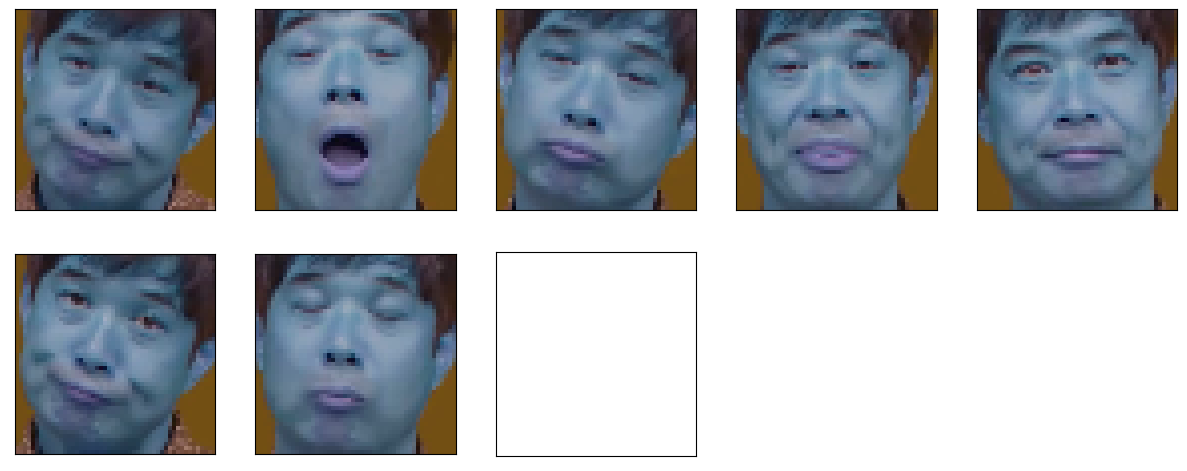